# Main Code

2022-02-06 19:55:04.545064: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-06 19:55:04.545297: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


'int' object has no attribute 'decode'
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
Image Received
Image returned


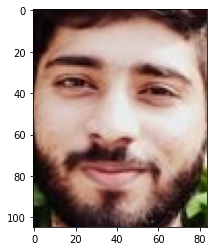

1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' obj

In [ ]:
import os
import time
import numpy as np
import redis
from IPython.display import clear_output
from PIL import Image
from io import BytesIO
import base64
import json
import matplotlib.pyplot as plt
from face_detection import get_face
from utils import img_to_txt, decode_img, log_error


##########################
#
#   Global Variables
#
#
##########################

# Selecting Server
server = os.environ['redis_server'] if 'os.environ' in os.environ and len(os.environ['redis_server']) > 1 else 'localhost'
# connect with redis server as Bob
r = redis.Redis(host=server, port=6379)
# Publish and suscribe redis
req_p = r.pubsub()
# subscribe to request Channel
req_p.subscribe('new_request')







def process_request(request ):
    '''
    Do you request processing here
    '''
    im =  decode_img(request['image'])
    face = get_face(im)
    plt.imshow(face)
    plt.show()

def listen_stream():
    '''
    Listening to the stream. 
    
    IF got any request from the stream then process it at the same time.
    '''
    count = 0
    requests =[]  
    while 1:

        try:
            try:
                # Listening To the stream
                request = str(req_p.get_message()['data'].decode())
                if request is not None :requests.append(request)
            except TypeError as e: log_error(e)
            
            # If got any request from stream then process the function
            if len(requests) > 0:
                req_id = requests.pop(0)
                process_request(json.loads(request) )
                count += 1
                
            print(count)

        except Exception as e: log_error(e)

    
listen_stream()       